In [1]:
!pip install osmnx==0.16.2

     |████████████████████████████████| 92kB 9.1MB/s 
     |████████████████████████████████| 1.0MB 31.0MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 
     |████████████████████████████████| 1.0MB 37.4MB/s 
     |████████████████████████████████| 6.6MB 46.2MB/s 
     |████████████████████████████████| 10.3MB 29.2MB/s 
     |████████████████████████████████| 15.4MB 198kB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import sys
sys.path.append('/content/gdrive/MyDrive/Colab Notebooks (1)')

In [3]:
import osmnx as ox
import networkx as nx
#import queue
import math
import priority_dict

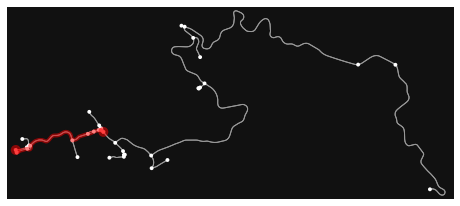

In [4]:
map_graph = ox.graph_from_place('Berkeley, California', network_type='drive')
origin = ox.get_nearest_node(map_graph, (37.8743, -122.277))
destination = list(map_graph.nodes())[-1]
shortest_path =nx.shortest_path(map_graph, origin, destination, weight='length')
fig, ax = ox.plot_graph_route(map_graph, shortest_path)

[53120081, 53120084, 2438953155, 2438953053, 53048389, 237134303, 260908806, 4333613313, 4333613310, 6562055675] 10


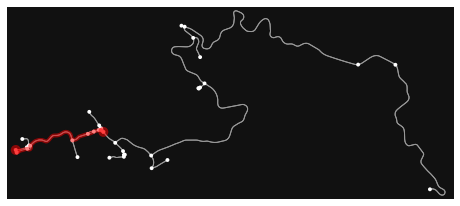

In [5]:
def heu(state_key, goal_key, node_data):
    # TODO Your code here. Note that this may be hard for the
    # students to figure out on their own.
    n1 = node_data[state_key]
    n2 = node_data[goal_key]

    # Get the longitude and latitude for each vertex.
    long1 = n1['x']*math.pi/180.0
    lat1 = n1['y']*math.pi/180.0
    long2 = n2['x']*math.pi/180.0
    lat2 = n2['y']*math.pi/180.0
    
    # Use a spherical approximation of the earth for
    # estimating the distance between two points.
    r = 6371000
    x1 = r*math.cos(lat1)*math.cos(long1)
    y1 = r*math.cos(lat1)*math.sin(long1)
    z1 = r*math.sin(lat1)

    x2 = r*math.cos(lat2)*math.cos(long2)
    y2 = r*math.cos(lat2)*math.sin(long2)
    z2 = r*math.sin(lat2)

    d = ((x2-x1)**2 + (y2-y1)**2 + (z2-z1)**2)**0.5
    
    return d


def asearch(s,t,graph):
  open_queue=priority_dict.priority_dict({})
  closed={}
  predecessors={}
  costs={}

  node_data=graph.nodes(True)

  costs[s]=0
  open_queue[s]=heu(s,t,node_data)
  goal_node=False
  while (open_queue):
    node,node_path=open_queue.pop_smallest()
    node_path=costs[node]

    if node==t:
      goal_node=True
      break
    for edge in graph.out_edges([node], data=True):
      sucessor=edge[1]
      if sucessor in closed:
        continue
      
      if sucessor not in open_queue:
        costs[sucessor]=node_path + edge[2]['length']
        open_queue[sucessor]=node_path + edge[2]['length'] + heu(sucessor,t,node_data)
        predecessors[sucessor]=node
      else:
        if edge[2]['length'] + node_path < costs[sucessor]:
          costs[sucessor]=edge[2]['length'] + node_path
          open_queue[sucessor]=node_path + edge[2]['length'] + hue(sucessor, t, node_data)
          predecessors[sucessor]=node
    closed[node]=1

  return path(s,t,predecessors)

  if not goal_node:
    raise ValueError('goal not found')


def path(s,t,predecessors):
  n=t
  OP=[t]
  while (n!=s):
#    print(n)
    n=predecessors[n]
    OP.insert(0,n)
  return OP
#  print(s,'asd',t,'qwe',graph)
#  print(type(open_queue))
#  print(map_graph.out_edges([node],data=True))
#  print(node)
#  print(path_cost)
p=asearch(origin,destination,map_graph)
#print(p,len(p))
print(p, len(p))
fig,ax=ox.plot_graph_route(map_graph,p)


In [ ]:
for i in range(10):
  i = i + 2
  print(i, end='')


234567891011